In [85]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import sys
sys.path.append('/n/des/lee.5922/Dropbox/repositories/bandpower/SNR/')
sys.path.append('/n/des/lee.5922/programs/cosmolike/MG_musigma/')
from noshellavg import *
from run_error_analysis import *
from plot_chain import plot_single, plot_triple, plot_distributions, plot_summary_bar
%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
Ashley_mat = np.genfromtxt('../Ashley_mat.dat')

In [3]:
#kk, kk_s = np.linspace(0.004, 2, 500, retstep=True)
kk, kk_s = np.linspace(0.0, 2, 501, retstep=True)
#kk, kk_s = np.linspace(0.02, 0.3, 71, retstep=True)
rr, rr_s = np.linspace(32, 200, 43, retstep=True)

print kk_s, rr_s
print kk[5], kk[75]

0.004 4.0
0.02 0.3


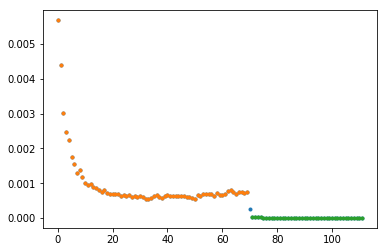

In [4]:
fig, ax = plt.subplots()
ax.plot(np.arange(Ashley_mat.diagonal().size ),Ashley_mat.diagonal(), '.' )
ax.plot(np.arange(0, 70),Ashley_mat.diagonal()[0:70], '.' )
ax.plot(np.arange(71, 112),Ashley_mat.diagonal()[71:], '.' )

In [98]:
RSDPower = NoShell_covariance(0.0001, 10, 0.001, 180, 10000, 181, 5000, 2,0.74,3.5,3.0e-04,logscale = False)
p_model = RSDPower.multipole_P(0)
xi_model = RSDPower.fourier_transform_kr(0, p_model)
covP_model = RSDPower.covariance_PP(0,0)
#covPxi_model = RSDPower.covariance_PXi(0,0)
#RSDPower.covariance_Xi_all()
#covxi_model = RSDPower.covariance00
#covtot_model = np.vstack(( np.hstack((covP_model, covPxi_model )), np.hstack((covPxi_model.T, covxi_model )) ))

In [89]:
p_model.shape

(4999,)

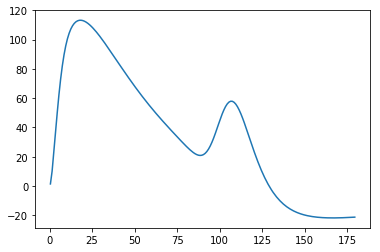

In [97]:
fig, ax = plt.subplots()
ax.plot(RSDPower.rcenter, RSDPower.rcenter**2*xi_model)

In [9]:
def mock_covariance(p_model, xi_model, p_mock, xi_mock):
    m1, m2 = np.mgrid[0:p_model.size, 0:xi_model.size]
    mock_covpxi = np.zeros(( p_model.size, xi_model.size ))
    for p, x in zip(p_mock, xi_mock) :
        mock_covpxi += ( p[m1] - p_model[m1]) * (x[m2] - xi_model[m2])
    mock_covpxi = 1./( len(p_mock) - 1 ) * mock_covpxi
    
    if p_model.size == xi_model.size : mock_covpxi = (mock_covpxi + mock_covpxi.T)/2.
    return mock_covpxi

In [102]:
def generate_mocks( RSDPower, p_model, covP_model, size = 500 ):
    print 'generate mocks... size=', size
    p_mock = np.random.multivariate_normal(p_model, covP_model, size=size)
    xi_mock = np.array([ RSDPower.fourier_transform_kr(0, p) for p in p_mock])
    
    return p_mock, xi_mock
    
def save_mocks( RSDPower, p_model, covP_model, size = 500, header = '', dir = '../data_txt/mocks/'  ):
    
    if not os.path.exists(dir) : os.makedirs(dir)
    p_mock, xi_mock = generate_mocks( RSDPower, p_model, covP_model, size = size )
    
    DAT_p = np.column_stack(( p_mock ))
    DAT_xi = np.column_stack((xi_mock))
    #import os
    #os.mkdir('../data_txt/mocks/')
    np.savetxt(dir + 'mocks_p.dat', DAT_p, header = header)
    np.savetxt(dir + 'mocks_xi.dat', DAT_xi,header = header)
    np.savetxt(dir + 'r.dat', RSDPower.rcenter,header = header)
    np.savetxt(dir + 'k.dat', RSDPower.kcenter_y,header = header)
    
def load_mocks( dir = '../data_txt/mocks/'  ):
    mocks_p = np.loadtxt(dir + 'mocks_p.dat')
    mocks_xi = np.loadtxt(dir + 'mocks_xi.dat')
    rcenter = np.loadtxt(dir + 'r.dat')
    kcenter = np.loadtxt(dir + 'k.dat')
    return kcenter, mocks_p, rcenter, mocks_xi

In [104]:
len(p_mock)

5000

In [105]:
p_mock[0]

array([-31405.11761458,  18781.87766899,   -819.99611296, ...,
         3332.17245961,   3334.08091283,   3334.1567587 ])

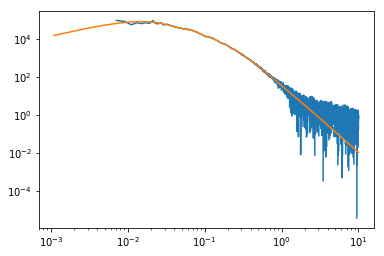

In [108]:
fig, ax = plt.subplots()
ax.loglog(RSDPower.kcenter_y, p_mock[0] - 1./RSDPower.nn)
ax.loglog(RSDPower.kcenter_y, p_model - 1./RSDPower.nn)

In [99]:
p_mock = np.random.multivariate_normal(p_model, covP_model, size=5000)
xi_mock = np.array([ RSDPower.fourier_transform_kr(0, p) for p in p_mock])

In [ ]:
header = 'RSDPower = NoShell_covariance(0.0001, 10, 0.001, 180, 10000, 181, 5000, 2,0.74,3.5,3.0e-04,logscale = False)'
dirs = '../data_txt/mocks6/'
save_mocks( RSDPower, p_model, covP_model, size = 1000, header = header, dir = dirs  )
kcenter, p_mock, rcenter, xi_mock = load_mocks( dir = '../data_txt/mocks6/'  )
#kcenter, p_mock, rcenter, xi_mock = load_mocks(dir = dirs)
#mocks = np.vstack(( p_mock, xi_mock ))

In [120]:
mock_covpxi = mock_covariance(p_model, xi_model, p_mock, xi_mock)
mock_covp = mock_covariance(p_model, p_model, p_mock, p_mock)
mock_covxi = mock_covariance(xi_model, xi_model, xi_mock, xi_mock)
mock_covtot = np.vstack(( np.hstack((mock_covp, mock_covpxi )), np.hstack((mock_covpxi.T, mock_covxi )) ))

In [121]:
m1, m2 = np.mgrid[0:mock_covp.diagonal().size, 0:mock_covxi.diagonal().size]
rij_mock = mock_covpxi * 1./np.sqrt(mock_covp.diagonal()[m1] * mock_covxi.diagonal()[m2])
rij_model = covPxi_model * 1./np.sqrt(covP_model.diagonal()[m1] * covxi_model.diagonal()[m2])

0.3336300180018002
0.3336300180018002


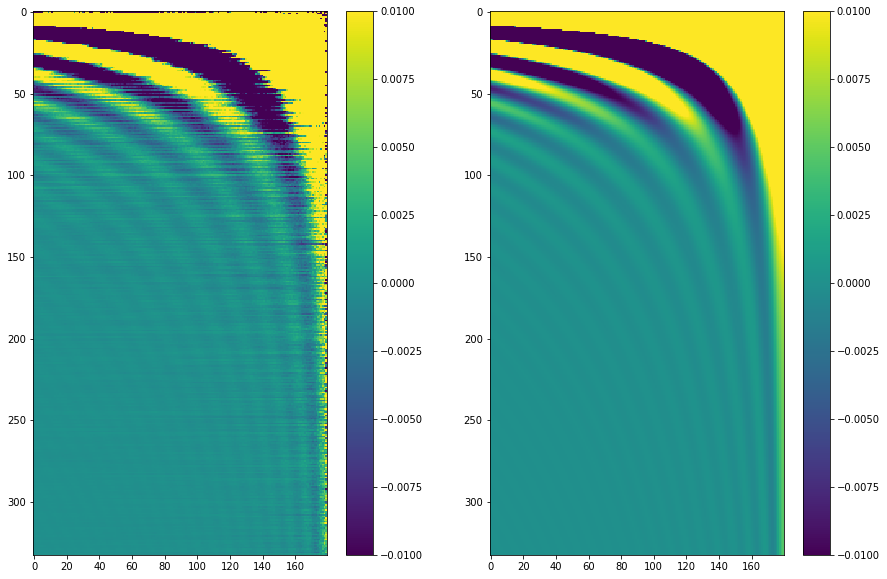

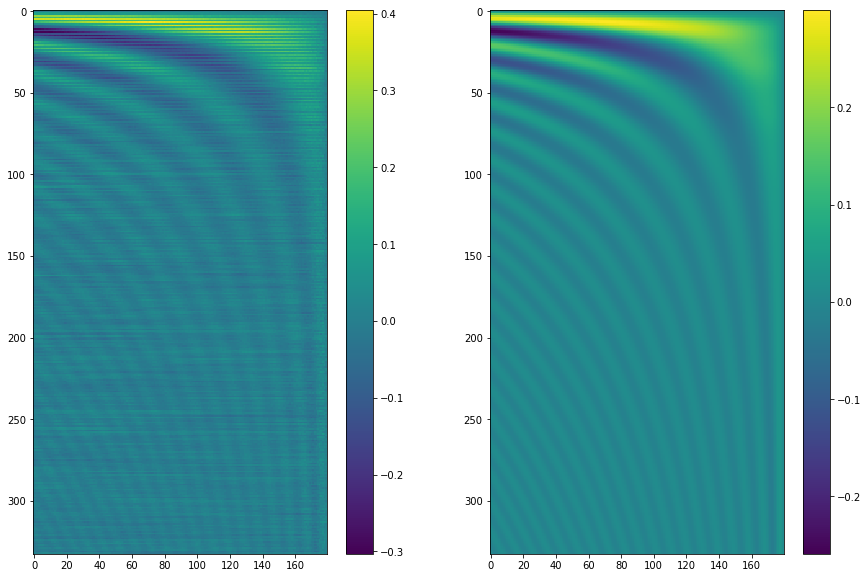

In [122]:
fig , (ax, ax2) = plt.subplots(1,2, figsize = (15, 10))
#im = ax.imshow(np.log10(mock_covpxi) )
print RSDPower.kcenter[RSDPower.kcenter.size/30]
im = ax.imshow(mock_covpxi[:RSDPower.kcenter.size/30,:], vmin = -0.01, vmax = 0.01 )
fig.colorbar(im, ax=ax)

im2 = ax2.imshow(covPxi_model[:RSDPower.kcenter.size/30,:], vmin = -0.01, vmax = 0.01 )
fig.colorbar(im2, ax=ax2)


fig , (ax, ax2) = plt.subplots(1,2, figsize = (15, 10))
#im = ax.imshow(np.log10(mock_covpxi) )
print RSDPower.kcenter[RSDPower.kcenter.size/30]
im = ax.imshow(rij_mock[:RSDPower.kcenter.size/30,:] )
fig.colorbar(im, ax=ax)

im2 = ax2.imshow(rij_model[:RSDPower.kcenter.size/30,:] )
fig.colorbar(im2, ax=ax2)

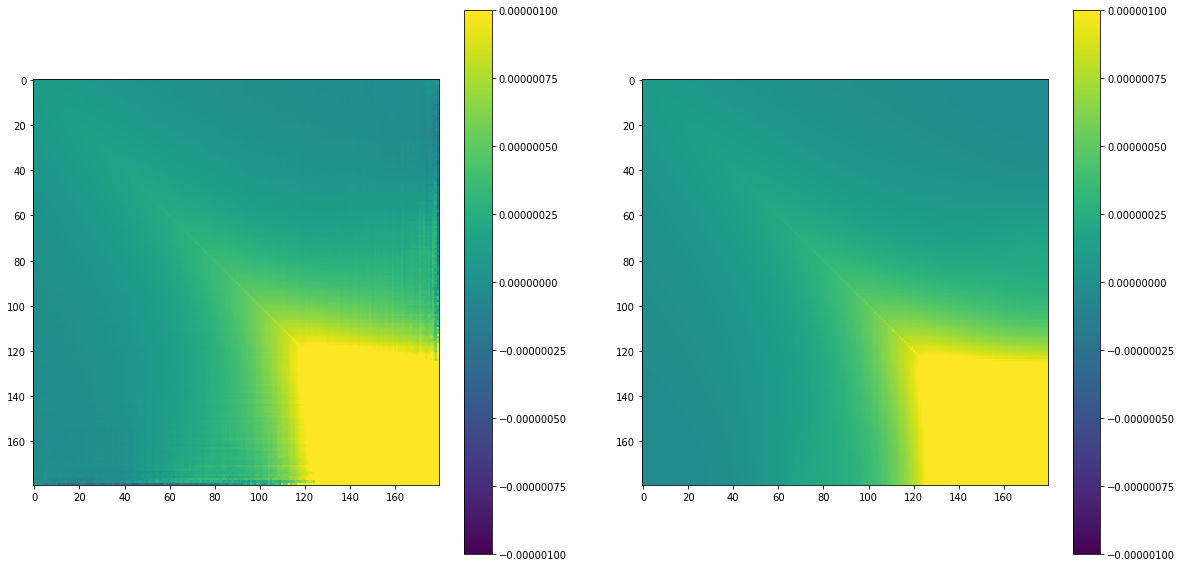

In [114]:
fig , (ax, ax2) = plt.subplots(1,2, figsize = (20, 10))
#im = ax.imshow(np.log10(mock_covpxi) )
im = ax.imshow(mock_covxi, vmin = -0.000001, vmax = 0.000001 )
fig.colorbar(im, ax=ax)

im2 = ax2.imshow(covxi_model, vmin = -0.000001, vmax = 0.000001 )
fig.colorbar(im2, ax=ax2)

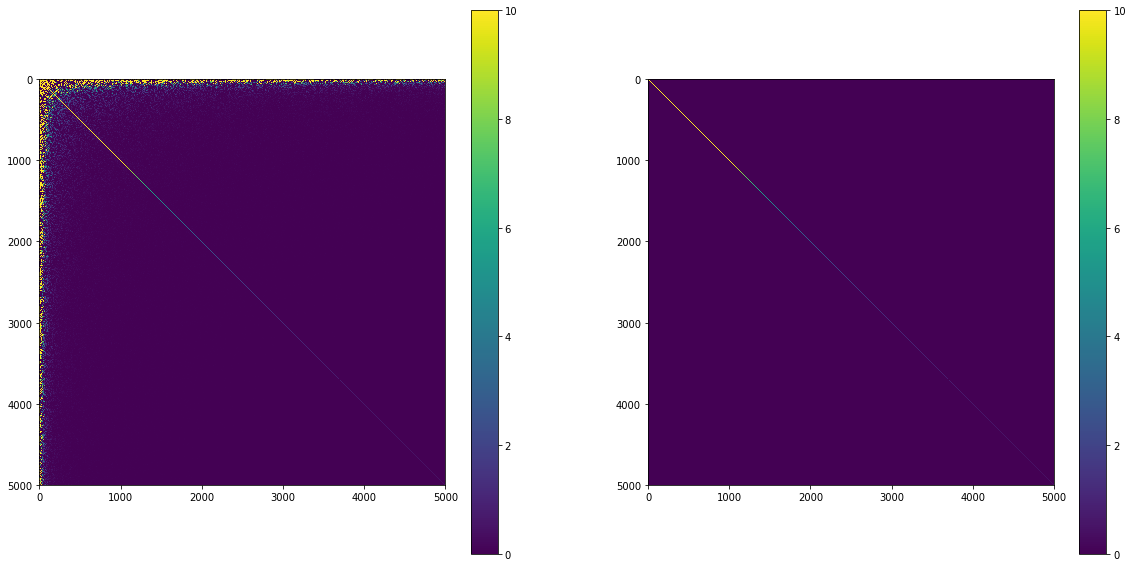

In [123]:
fig , (ax, ax2) = plt.subplots(1,2, figsize = (20, 10))
#im = ax.imshow(np.log10(mock_covp) )
im = ax.imshow(mock_covp, vmin = 0, vmax = 10 )
fig.colorbar(im, ax=ax)

im2 = ax2.imshow(covP_model,vmin = 0, vmax = 10 )
fig.colorbar(im2, ax=ax2)

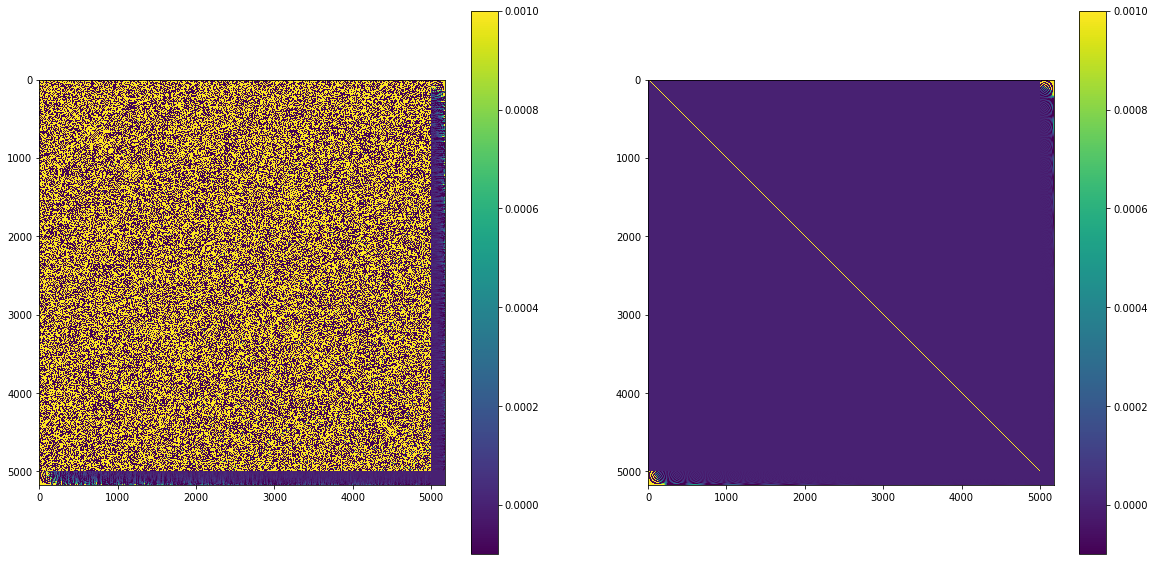

In [64]:
fig , (ax, ax2) = plt.subplots(1,2, figsize = (20, 10))
#im = ax.imshow(np.log10(mock_covp) )
im = ax.imshow(mock_covtot, vmin = -0.0001, vmax = 0.001 )
fig.colorbar(im, ax=ax)

im2 = ax2.imshow(covtot_model,vmin = -0.0001, vmax = 0.001 )
fig.colorbar(im2, ax=ax2)

In [ ]:
RSDPower.kcenter.size

In [ ]:
import scipy as sp
import scipy.interpolate

def log_interp1d(xx, yy, kind='linear'):
    logx = np.log10(xx)
    logy = np.log10(yy)
    lin_interp = sp.interpolate.interp1d(logx, logy, kind=kind)
    log_interp = lambda zz: np.power(10.0, lin_interp(np.log10(zz)))
    return log_interp

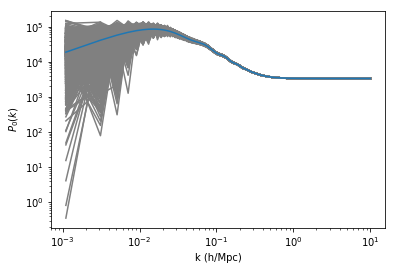

In [124]:
fig, ax = plt.subplots()
for m in p_mock : ax.loglog(RSDPower.kcenter_y, m, color = 'grey')
ax.loglog(RSDPower.kcenter_y, p_model)  
#ax.loglog(RSDPower2.kcenter_y, p_model2, label = 'kmax = 100')  
ax.set_xlabel('k (h/Mpc)')
ax.set_ylabel(r'$P_0(k)$')
ax.legend()

NameError: name 'RSDPower2' is not defined

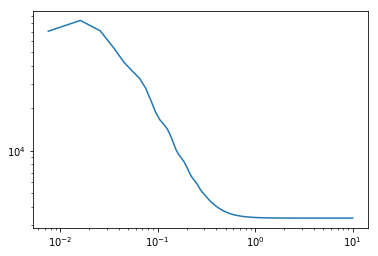

In [120]:
fig, ax = plt.subplots()
#for m in p_mock : ax.loglog(RSDPower.kcenter_y, m, color = 'grey')
ax.loglog(RSDPower.kcenter_y, p_model, label = 'kmax = 2')  
ax.loglog(RSDPower2.kcenter_y, p_model2, label = 'kmax = 100')  
ax.set_xlabel('k (h/Mpc)')
ax.set_ylabel(r'$P_0(k)$')
ax.legend()

fig, ax = plt.subplots()
#for m in xi_mock : ax.loglog(RSDPower.rcenter, m, color='grey')
ax.loglog(RSDPower.rcenter, xi_model, label = 'kmax = 2')  
ax.loglog(RSDPower2.rcenter, xi_model2, label = 'kmax = 100')  
ax.set_xlabel('r (Mpc/h)')
ax.set_ylabel(r'$\xi_0 (k)$')
ax.legend()


xi_model2_interp = log_interp1d(RSDPower2.rcenter, xi_model2)
xi_model2_interp = xi_model2_interp(RSDPower.rcenter)
fracdiff = 1. - xi_model2_interp*1./xi_model
fig, ax = plt.subplots()
#for m in xi_mock : ax.loglog(RSDPower.rcenter, m, color='grey')
ax.semilogx(RSDPower.rcenter, fracdiff, label = 'fracdiff')  
ax.set_xlabel('r (Mpc/h)')
ax.set_ylabel(r'$\xi_0 (k)$')
ax.legend()

In [ ]:
from numpy.linalg import inv
fig, ax = plt.subplots()
ax.loglog(RSDPower.kcenter_y, mock_covp.diagonal(), label = 'mock covP', color = 'blue')
ax.loglog(RSDPower.kcenter_y, covP_model.diagonal(), 'r--', label = 'theory covP')
#ax.loglog(RSDPower2.kcenter_y, covP_model2.diagonal(), '--', label = 'kmax = 50')
ax.legend()

from numpy.linalg import inv
fig, ax = plt.subplots()
ax.loglog(RSDPower.rcenter, mock_covxi.diagonal(), label = 'mock covxi', color = 'blue')
ax.loglog(RSDPower.rcenter, covxi_model.diagonal(), 'r--', label = 'theory covxi')
#ax.loglog(RSDPower2.rcenter, covxi_model2.diagonal(), '--', label = 'kmax = 100')
ax.legend()


#covxi_model2_interp = log_interp1d(RSDPower2.rcenter, covxi_model2.diagonal())
#covxi_model2_interp = covxi_model2_interp(RSDPower.rcenter)
#fracdiff = 1. - covxi_model2_interp*1./covxi_model.diagonal()

#fig, ax = plt.subplots()
#ax.loglog(RSDPower.rcenter, mock_covxi.diagonal(), label = 'mock', color = 'grey')
#ax.semilogx(RSDPower.rcenter, fracdiff, label = 'fracdiff')
#ax.legend()


In [157]:
mock_covpxi.shape

(999, 180)

0 179.5009312701521
50 129.50156753335938
100 79.502654703735
150 29.506485064833146


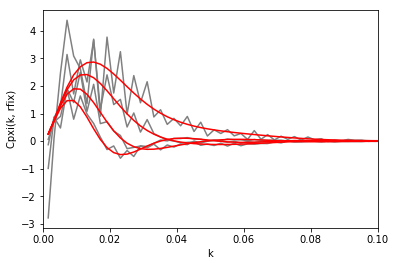

In [66]:
fig, ax = plt.subplots()
for i in np.arange(0, RSDPower.rcenter.size-1, 50):
    print i, RSDPower.rcenter[i]
    ax.plot(RSDPower.kcenter_y, mock_covpxi[:,i], color = 'grey')
for i in np.arange(0, RSDPower.rcenter.size-1, 50):
    ax.plot(RSDPower.kcenter_y, covPxi_model[:,i], color = 'red')
#ax.loglog(RSDPower2.kcenter_y, covP_model2.diagonal(), '--', label = 'kmax = 50')
ax.legend()
ax.set_xlim(0, 0.1)
#ax.set_ylim(-0.1, 0.1)
ax.set_xlabel('k')
ax.set_ylabel('Cpxi(k, rfix)')

# from numpy.linalg import inv
fig, ax = plt.subplots()
ax.loglog(RSDPower.kcenter_y, inv(mock_covp).diagonal())
ax.loglog(RSDPower.kcenter_y, inv(covP_model).diagonal())

from numpy.linalg import inv
fig, ax = plt.subplots()
ax.loglog(RSDPower.rcenter, inv(mock_covxi).diagonal())
ax.loglog(RSDPower.rcenter, inv(covxi_model).diagonal())

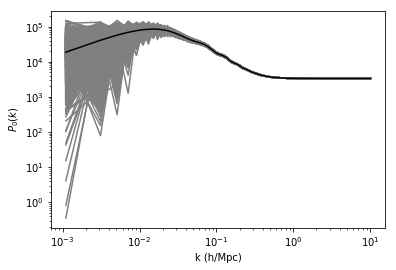

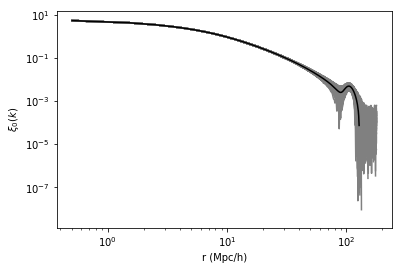

In [125]:
fig, ax = plt.subplots()
for m in p_mock : ax.loglog(RSDPower.kcenter_y, m, color = 'grey')
ax.loglog(RSDPower.kcenter_y, p_model, 'k-')   
ax.set_xlabel('k (h/Mpc)')
ax.set_ylabel(r'$P_0(k)$')

fig, ax = plt.subplots()
for m in xi_mock : ax.loglog(RSDPower.rcenter, m, color='grey')
ax.loglog(RSDPower.rcenter, xi_model, 'k-')
ax.set_xlabel('r (Mpc/h)')
ax.set_ylabel(r'$\xi_0 (k)$')

In [46]:
Cpp = np.genfromtxt('/n/des/lee.5922/programs/cosmolike/MG_musigma/datav/cosmolike_cosmosis/pkred10_p002_03.cov')
Cpxi = Ashley_mat[0:70, 70:]
Cxi = Ashley_mat[70:, 70:]
Ctot = np.vstack(( np.hstack((Cpp, Cpxi)), np.hstack((Cpxi.T, Cxi)) ))
#np.savetxt('data_txt/cov/Ashley_mat_p.cov', Cpp)
#np.savetxt('data_txt/cov/Ashley_mat_pxi.cov', Cpxi)
#np.savetxt('data_txt/cov/Ashley_mat_xi.cov', Cxi)
#np.savetxt('data_txt/cov/Ashley_mat_tot.cov', Ctot)


Fpp = np.linalg.inv(Cpp)
Fxi = np.linalg.inv(Cxi)
Ftot = np.linalg.inv(Ctot)
zeros = np.zeros((Cpxi.shape))
Fdiff = np.vstack(( np.hstack((Fpp, zeros)), np.hstack((zeros.T, Fxi)) ))

#np.savetxt('data_txt/cov/Ashley_mat_p.fisher', Fpp)
#np.savetxt('data_txt/cov/Ashley_mat_xi.fisher', Fxi)
#np.savetxt('data_txt/cov/Ashley_mat_tot.fisher', Ftot)
#np.savetxt('data_txt/cov/Ashley_mat_diff.fisher', Fdiff)


In [6]:
_, analytic_Fp, analytic_Fxi, analytic_Ftot = np.genfromtxt('../data_txt/test_b_Ashley_p0_fisher_params.txt')
analytic_Fdiff = analytic_Fp + analytic_Fxi

print 'analytic err',1./analytic_Fp, 1./analytic_Fxi, 1./analytic_Ftot, 1./analytic_Fdiff
analytic_chain_p = np.random.multivariate_normal([2.0], [[1./analytic_Fp]], size=100000)
analytic_chain_xi = np.random.multivariate_normal([2.0], [[1./analytic_Fxi]], size=100000)
analytic_chain_tot = np.random.multivariate_normal([2.0], [[1./analytic_Ftot]], size=100000)
analytic_chain_diff = np.random.multivariate_normal([2.0], [[1./analytic_Fdiff]], size=100000)


analytic err 4.0745088375894615e-06 0.0006837409556016197 3.8312022039138455e-06 4.050372098702484e-06


analytic 0.91854549893


sample size (7320, 1) (19000, 1) (6948, 1)


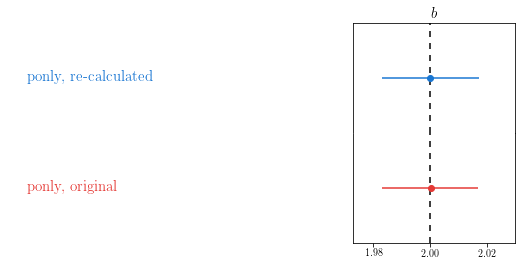

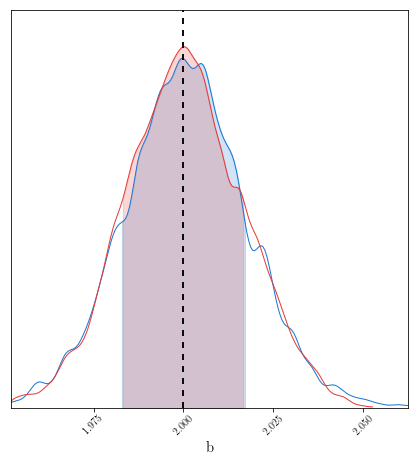

In [59]:
_, analytic_Fp, analytic_Fxi, analytic_Ftot = np.genfromtxt('data_txt/test_b_Ashley_p0_fisher_params.txt')
analytic_Fdiff = analytic_Fp + analytic_Fxi

analytic_chain_p = np.random.multivariate_normal([2.0], [[1./analytic_Fp]], size=100000)
analytic_chain_xi = np.random.multivariate_normal([2.0], [[1./analytic_Fxi]], size=100000)
analytic_chain_tot = np.random.multivariate_normal([2.0], [[1./analytic_Ftot]], size=100000)
analytic_chain_diff = np.random.multivariate_normal([2.0], [[1./analytic_Fdiff]], size=100000)

params_name = ['b']
params_truth = [2.0]
ponly_chains = np.genfromtxt('like/like_mcmc_re_Ashley_ponly_b_p0_sam24000')[3000:, :-1]
ponly_chains2 = np.genfromtxt('like/like_mcmc_Ashley_ponly_b_p0_sam24000')[5000:, :-1]
xionly_chains = np.genfromtxt('like/like_mcmc_Ashley_xionly_b_p0_sam24000')[5000:, :-1]
combined_chains = np.genfromtxt('like/like_mcmc_Ashley_combined_b_p0_sam24000')[5000:, :-1]
diff_chains = np.genfromtxt('like/like_mcmc_re_Ashley_diff_b_p0_sam24000')[3000:, :-1]

print 'sample size', ponly_chains.shape, xionly_chains.shape, diff_chains.shape

chains = [ponly_chains, ponly_chains2]
chain_names = ['ponly, re-calculated', 'ponly, original', 'xi only (32 - 200)', 'combined', 'diff']

#chains = [ponly_chains, ponly_chains2, combined_chains, diff_chains]
#chain_names = ['p only (0.02 - 0.3)', 'xi only (32 - 200)', 'combined', 'diff']

plot_summary_bar(chains, params_name, params_truth=params_truth, chain_names=chain_names)
plot_distributions(chains, params_name, params_truth=params_truth, chain_names = chain_names)

In [32]:
#Analytic matrix
print np.cov(combined_chains.ravel())
print np.cov(diff_chains.ravel())

print 'analytic, err_tot/err_diff' ,np.sqrt(1./analytic_Ftot /(1./analytic_Fdiff))
RSDPower2 = NoShell_covariance(0.0001, 50, 18, 180, 20001, 101, 5001, 2, 0.74,3.5,3e-04,logscale = True)
p_model2 = RSDPower2.multipole_P(0)
xi_model2 = RSDPower2.fourier_transform_kr(0, p_model2)
covP_model2 = RSDPower2.covariance_PP(0,0)
covPxi_model2 = RSDPower2.covariance_PXi(0,0)
RSDPower2.covariance_Xi_all()
covxi_model2 = RSDPower2.covariance00
covtot_model2 = np.vstack(( np.hstack((covP_model2, covPxi_model2 )), np.hstack((covPxi_model2.T, covxi_model2 )) ))print 'mock, err_tot/err_diff    ', np.sqrt(np.cov(combined_chains.ravel())/ np.cov(diff_chains.ravel()))

5.83082050503e-05
0.0029342229866
analytic, err_tot/err_diff 0.95840779365
mock, err_tot/err_diff     0.140967266588


In [ ]:


n1, n2 = 2000, 2900
RSDPower2.kcenter_y[n1], RSDPower2.kcenter_y[n2], RSDPower2.rcenter[0], RSDPower2.rcenter[-1]

covtot_model_cutk = np.vstack(( np.hstack((covP_model2[n1:n2, n1:n2], covPxi_model2[n1:n2,:] )), np.hstack((covPxi_model2[n1:n2,:].T, covxi_model2 )) ))
covinv = inv(covtot_model_cutk)
covinv_p = inv(covP_model2[n1:n2, n1:n2])
covinv_xi = inv(covxi_model2 )
np.sum(covinv.diagonal() < 0)

dpdb,dpdf,dpds = RSDPower2. derivative_P_bfs(0)
dxidb, dxidf, dxids  = RSDPower2.derivative_bfs(0)
derivative_datap = np.vstack([dpdb[n1:n2], dpdf[n1:n2]]) #, dpds[n1:n2]])
derivative_dataxi = np.vstack([dxidb, dxidf])#, dxids])
derivative_datav = np.hstack([derivative_datap, derivative_dataxi ])

F_tot = np.dot( np.dot( derivative_datav, covinv), derivative_datav.T )
F_p = np.dot( np.dot( derivative_datap, covinv_p), derivative_datap.T )
F_xi = np.dot( np.dot( derivative_dataxi, covinv_xi), derivative_dataxi.T )
F_nod = F_p + F_xi
DAT = np.column_stack(( np.arange(F_tot.size), F_p.ravel(), F_xi.ravel(), F_tot.ravel(), F_nod.ravel() ))
np.savetxt('../data_txt/test_bf_logscale_fisher_params.txt', DAT)

#sigma_b, sigma_f, sigma_s = np.sqrt(inv(F_tot).diagonal())
#sigma_pb, sigma_pf, sigma_ps = np.sqrt(inv(F_p).diagonal())
#sigma_xb, sigma_xf, sigma_xs = np.sqrt(inv(F_xi).diagonal())
#sigma_nb, sigma_nf, sigma_xs = np.sqrt(inv(F_nod).diagonal())

sigma_b, sigma_f = np.sqrt(inv(F_tot).diagonal())
sigma_pb, sigma_pf = np.sqrt(inv(F_p).diagonal())
sigma_xb, sigma_xf = np.sqrt(inv(F_xi).diagonal())
sigma_nb, sigma_nf = np.sqrt(inv(F_nod).diagonal())

fig, ax = plt.subplots()
ax.errorbar(1, 2, yerr = sigma_pb, fmt='.' )
ax.errorbar(2, 2, yerr = sigma_xb,  fmt='.' )
ax.errorbar(3, 2, yerr = sigma_b,  fmt='.' )
ax.errorbar(4, 2, yerr = sigma_nb, fmt='.' )